# Introduction to regression with Neural Networks in Tensorflow

In [ ]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.11.0


# Creating data to view and fit

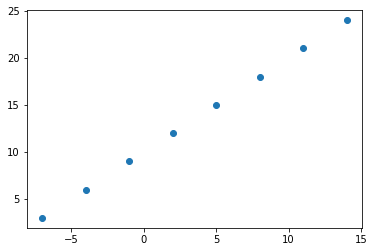

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Creating features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Creating labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visiualise the data
plt.scatter(X,y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output Shapes

In [ ]:
X.shape

(8,)

In [ ]:
y.shape

(8,)

In [ ]:
# Create a demo tensor for housing price prediction problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
# Turn our numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype= tf.float32)
y = tf.cast(tf.constant(y), dtype= tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

#  Steps in modelling with Tensorflow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compile a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns its learning) and evaluatio metrics(what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels)

In [ ]:
# set random see
tf.random.set_seed(42)

# 1. Create a  model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 877ms/step - loss: 15.8124 - mae: 15.8124
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 15.5311 - mae: 15.5311
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 15.2499 - mae: 15.2499
Epoch 4/5
1/1 [==============================] - 0s 15ms/step - loss: 14.9686 - mae: 14.9686
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 14.7766 - mae: 14.7766


In [ ]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 312ms/step


array([[-5.711253]], dtype=float32)

# Improving model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function each layer.
2. **Compiling a model** - herw we might change the optimization function or perhaps the learning rate of the optimization function
3. **Fitting a model** - here we might fit a model for more epochs(leave it training for longer) or on more data(give the model more examples to learn from)


In [ ]:
# Rebuilding the model

# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 9.4421 - mae: 9.4421
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 9.3096 - mae: 9.3096
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 9.1771 - mae: 9.1771
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 9.0446 - mae: 9.0446
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 8.9121 - mae: 8.9121
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 8.7796 - mae: 8.7796
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 8.6471 - mae: 8.6471
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 8.5146 - mae: 8.5146
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 8.3821 - mae: 8.3821
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 8.2496 - mae: 8.2496
Epoch 11/100
1/1 [==============================] - 0s 24ms/step - loss

In [ ]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Model Prediction
y_pred = model.predict([17.0])

1/1 [==============================] - 0s 79ms/step


In [ ]:
y_pred

array([[30.019642]], dtype=float32)

In [ ]:
# Trying ourselves

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the Model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 953ms/step - loss: 13.7611 - mae: 13.7611
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 13.2703 - mae: 13.2703
Epoch 3/100
1/1 [==============================] - 0s 31ms/step - loss: 12.7797 - mae: 12.7797
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 12.2866 - mae: 12.2866
Epoch 5/100
1/1 [==============================] - 0s 24ms/step - loss: 11.7885 - mae: 11.7885
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 11.2829 - mae: 11.2829
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 10.7671 - mae: 10.7671
Epoch 8/100
1/1 [==============================] - 0s 29ms/step - loss: 10.2385 - mae: 10.2385
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 9.6943 - mae: 9.6943
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 9.1319 - mae: 9.1319
Epoch 11/100
1/1 [==============================] - 

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 150ms/step


array([[30.127378]], dtype=float32)

# When it comes to evaluation...there are 3 words you should memorize

> "Visualise, visualise, visualise"

It's a good idea to visualise:
* The data- what data are we working with? WHat does it look like?
* The model itself- what does our model look like?
* The training of a model- how does a model perform while it learns?
* The predictions of the model- how do the predictions of the model line up against the ground truth(the original labels)

In [ ]:
 # Make bigger dataset
 X = tf.range(-100,100,4)
 X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labesl for the dataset
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

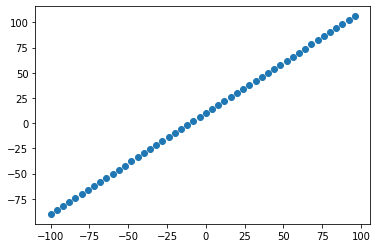

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets...

* **Training Set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation Set** - the model gets tuned on this data, which is typically 10-15% of the data available
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 training samples(80% of the data)
y_train = y[:40]

X_test = X[40:] # last 20 testing samples(20% of the data)
y_test = y[40:]

len(X_train) , len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

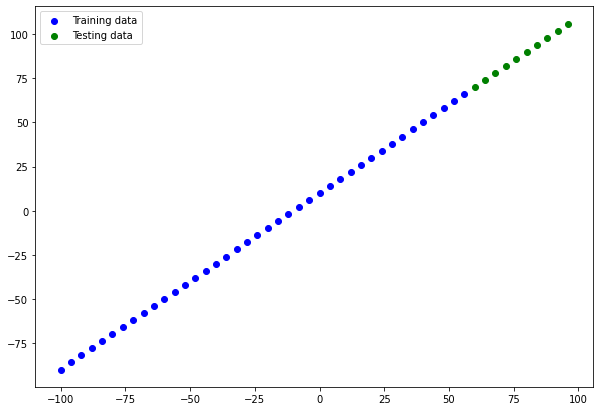

In [ ]:
### Visualising the data

plt.figure(figsize=(10,7))

#Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

#Plot the test data in green
plt.scatter(X_test,y_test, c="g", label="Testing data")
plt.legend()

In [ ]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1),y_train,epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 17ms/step - loss: 89.4362 - mae: 89.4362
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 53.9808 - mae: 53.9808
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 17.9483 - mae: 17.9483
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 10.0540 - mae: 10.0540
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 11.3165 - mae: 11.3165
Epoch 6/100
2/2 [==============================] - 0s 17ms/step - loss: 10.4450 - mae: 10.4450
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 9.4221 - mae: 9.4221
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: 9.2919 - mae: 9.2919
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 11.9990 - mae: 11.9990
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 13.9670 - mae: 13.9670
Epoch 11/100
2/2 [==============================] - 0

In [ ]:
# lets create a model that builda automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model(Same as above)
model =tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss =tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total Params - total number of parameters in the model.
* Trainable Parameters - these are the parameters(patterns) the model can update as it trains
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**)

📖 **Resource**: For more in-depth overview of trainable parameters within a layer, check out MIT's introduction to deep learning video

In [ ]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

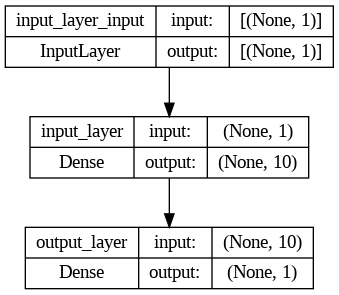

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

# Visualize our model's predictions

To visualise predictions , it's a good idea to plot them against the ground truth table

Often you'll see this in the form of `y_test` or `y_train` versus `y_pred`(ground truth versus your model's predictions)

In [ ]:
# Make some prediction
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 72ms/step


array([[ 75.70216 ],
       [ 80.63547 ],
       [ 85.56876 ],
       [ 90.502075],
       [ 95.43537 ],
       [100.36867 ],
       [105.30198 ],
       [110.23528 ],
       [115.16859 ],
       [120.1019  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note** : If you feel like you are going to reuse some kind of functionality in future, it is a good idea to turn it into a function

In [ ]:
# Creating a plotting function
def plot_predictions(train_data=X_train, train_labels=y_train,
                     test_data = X_test,
                     test_labels= y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compars predictions to ground truth labels.
  """
  plt.figure(figsize=(10,7))
  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")

  # Plot testing in green
  plt.scatter(test_data,test_labels, c="g",label = "Testing Data")

  #Plot model's prediction in red
  plt.scatter(test_data, predictions, c='r',label="Predictions")

  #Show the legend
  plt.legend()

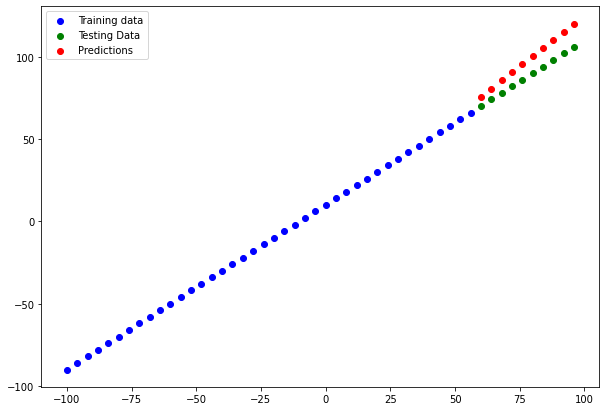

In [ ]:
plot_predictions(train_data = X_train,
                 train_labels=y_train,
                 test_data =X_test,
                 test_labels=y_test,
                 predictions=y_pred
                 )

### Evaluating model's prediction with regression evaluation metrics

Two of the main metrics are:
* MAE - mean absolute error, "on average", how wrong is each of model's predictions
* MSE- mean square error, "square the average error"

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 182ms/step - loss: 9.9020 - mae: 9.9020


[9.90202522277832, 9.90202522277832]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                               y_pred = tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.778702, 11.345813, 10.086247, 10.100415, 11.374148, 13.8212  ,
       17.441584, 22.235283, 27.168585, 32.1019  ], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 75.70216 ],
       [ 80.63547 ],
       [ 85.56876 ],
       [ 90.502075],
       [ 95.43537 ],
       [100.36867 ],
       [105.30198 ],
       [110.23528 ],
       [115.16859 ],
       [120.1019  ]], dtype=float32)>

In [ ]:
y_pred = tf.squeeze(y_pred)

In [ ]:
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 75.70216 ,  80.63547 ,  85.56876 ,  90.502075,  95.43537 ,
       100.36867 , 105.30198 , 110.23528 , 115.16859 , 120.1019  ],
      dtype=float32)>

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                               y_pred = tf.constant(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=9.902025>

In [ ]:
# Calculate Mean Squared Error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                     y_pred =y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=105.23631>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test,
                                        y_pred = tf.squeeze(y_pred))

def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test,
                                       y_pred = tf.squeeze(y_pred))

### Running Experiments to improve our model

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
            optimizer=tf.keras.optimizers.SGD(),
            metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 22ms/step - loss: 10.4275 - mae: 10.4275
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 9.2909 - mae: 9.2909
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 7.7861 - mae: 7.7861
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 8.7173 - mae: 8.7173
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 10.7874 - mae: 10.7874
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 9.9743 - mae: 9.9743
Epoch 7/100
2/2 [==============================] - 0s 15ms/step - loss: 9.0240 - mae: 9.0240
Epoch 8/100
2/2 [==============================] - 0s 14ms/step - loss: 9.0745 - mae: 9.0745
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 19.9028 - mae: 19.9028
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 10.7487 - mae: 10.7487
Epoch 11/100
2/2 [==============================] - 0s 17ms/st

1/1 [==============================] - 0s 63ms/step


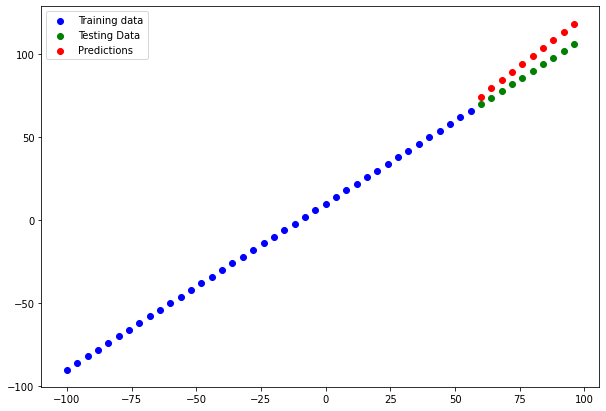

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

In [ ]:
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.61659>,
 <tf.Tensor: shape=(), dtype=float32, numpy=80.73277>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [ ]:
tf.random.set_seed(42)

# 1. Create the model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 23ms/step - loss: 43.9004 - mse: 2705.4243
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 33.1317 - mse: 1497.5491
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 37.3816 - mse: 2101.0674
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 27.1534 - mse: 1073.6838
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 14.8414 - mse: 275.0380
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 11.8263 - mse: 165.1511
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 12.9207 - mse: 230.6906
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.1336 - mse: 160.6943
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 40.7613 - mse: 2625.3130
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 28.1177 - mse: 1114.5959
Epoch 11/100
2/2 [====================

1/1 [==============================] - 0s 108ms/step


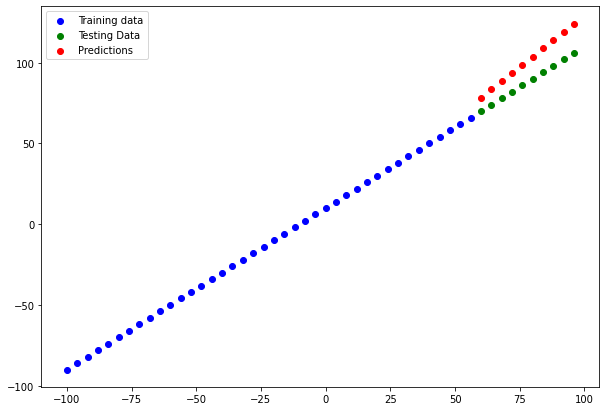

In [ ]:
# Make and plot predictions of model_2

y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test,y_preds_2)

In [ ]:
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.252612>,
 <tf.Tensor: shape=(), dtype=float32, numpy=185.637>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [ ]:
tf.random.set_seed(42)

# 1. Create the model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 19ms/step - loss: 25.0573 - mse: 1340.8342
Epoch 2/500
2/2 [==============================] - 0s 11ms/step - loss: 23.6236 - mse: 856.4326
Epoch 3/500
2/2 [==============================] - 0s 10ms/step - loss: 28.4884 - mse: 1204.4381
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 15.8723 - mse: 373.9302
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 21.9575 - mse: 703.1728
Epoch 6/500
2/2 [==============================] - 0s 19ms/step - loss: 11.1708 - mse: 138.7032
Epoch 7/500
2/2 [==============================] - 0s 12ms/step - loss: 12.2206 - mse: 190.7012
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 10.9736 - mse: 137.8673
Epoch 9/500
2/2 [==============================] - 0s 10ms/step - loss: 38.5217 - mse: 2299.6619
Epoch 10/500
2/2 [==============================] - 0s 12ms/step - loss: 26.0284 - mse: 952.6100
Epoch 11/500
2/2 [=====================

1/1 [==============================] - 0s 75ms/step


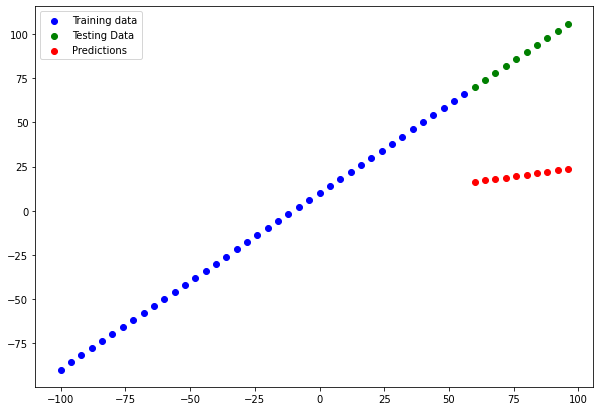

In [ ]:
# Make and plot predictions of model_2

y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_2 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test,y_preds_3)

In [ ]:
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.03224>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4712.9307>)

🔑**Note** - Start with small experiments(small models) and make sure they work and then increase their scale when necessary

# Comparing the results of our experiments

Summarise and compare the results

In [ ]:
# Let's compare model's results using pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
["model_2", mae_2.numpy(), mse_2.numpy()],
["model_3", mae_3.numpy(), mse_3.numpy()]]

In [ ]:
all_results =  pd.DataFrame(model_results, columns=["Model","MAE","MSE"])
all_results

,Model,MAE,MSE
0,model_1,8.616590,80.732773
1,model_2,13.252612,185.636993
2,model_3,68.032242,4712.930664


## Tracking your experiments

📖**Resource:** As you build more models, take look at:
* TensorBoard - a component of the TensorFlow library to help track modelling experiments
* Weights & Biases- a tool for tracking all of kinds of machine learning experiments(plugs straight into TensorBoard)

# Saving our Models

It allows us to use models outside Google Colab

There are two main firmats we can save our model's too:
1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model using SavedModel format
model_1.save("best_model_SavedModel_format")

In [ ]:
# Save model using HDF5 format
model_1.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model('/content/best_model_SavedModel_format')
loaded_SavedModel_format.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_1 predictions with SavedModel format predictions
model_1_preds = model_1.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_1_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 25ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
model_1_preds, loaded_SavedModel_format_preds

(array([[ 74.62622],
        [ 79.51297],
        [ 84.39972],
        [ 89.28647],
        [ 94.17322],
        [ 99.05997],
        [103.94671],
        [108.83346],
        [113.72021],
        [118.60696]], dtype=float32), array([[ 74.62622],
        [ 79.51297],
        [ 84.39972],
        [ 89.28647],
        [ 94.17322],
        [ 99.05997],
        [103.94671],
        [108.83346],
        [113.72021],
        [118.60696]], dtype=float32))

In [ ]:
# Load in a model using .h5 format
loaded_h5_model = tf.keras.models.load_model('/content/best_model_HDF5_format.h5')
loaded_h5_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_1 predictions with .h5 format predictions
model_1_preds = model_1.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_1_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 63ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# Download a model or any other file from Google Colab

if you want to download your files from Google Colab
1. You can go to the "files" tab and right click on the file you're after and click 'download'
2. Use code(seel below)
3. Save it to google drive by connecting Google Drive and copying it here


In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download('/content/best_model_HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp /content/best_model_HDF5_format.h5 "Destination Path"